In [21]:
from numpy import array
import time
import os
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import pickle


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


#Model Performance Evaluators
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.utils.class_weight import compute_class_weight

from joblib import parallel_backend
from joblib import Parallel, delayed


In [22]:
print('loading model >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')


mfilename='/cluster/pixstor/slotkinr-lab/sandaruwan/rubyRF/WT_dcr_red/wtdcrModels/rfc_WTvdcr_comb_tetra_set1_v1.pkl'
# load the model from disk
rfc_set1 = pickle.load(open(mfilename, 'rb'))

loading model >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [23]:
print('loading data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')


dcr_srWT_df= pd.read_csv('/cluster/pixstor/slotkinr-lab/sandaruwan/rubyRF/WT_dcr_red/predRF/dcrWT_SRWT_pr_tetra_set2_df.txt',header=0,sep='\t')


print('input shape: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
np.shape(dcr_srWT_df)



shuf_comb_df=dcr_srWT_df.iloc[np.random.permutation(len(dcr_srWT_df))]



shuf_comb_df=shuf_comb_df.reset_index(drop=True)

shuf_comb_df.info()


loading data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
input shape: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2762728 entries, 0 to 2762727
Columns: 262 entries, seq_id to TTTT
dtypes: int64(261), object(1)
memory usage: 5.4+ GB


In [24]:
ydt=shuf_comb_df['ptype']

xdt=shuf_comb_df.drop(['seq_id','ptype'],axis=1)


In [25]:
with parallel_backend('threading',n_jobs=64 ):

    print('prediction >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')

    y_pred = rfc_set1.predict(xdt)

prediction >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [28]:
from sklearn.metrics import accuracy_score

print('prediction accuracy score : {0:0.4f}'. format(accuracy_score(ydt, y_pred)))



print ("\nClassification report :\n",(classification_report(ydt,y_pred)))


prediction accuracy score : 0.7532

Classification report :
               precision    recall  f1-score   support

           0       0.84      0.77      0.80   1797447
           1       0.63      0.72      0.67    965281

    accuracy                           0.75   2762728
   macro avg       0.73      0.75      0.74   2762728
weighted avg       0.76      0.75      0.76   2762728



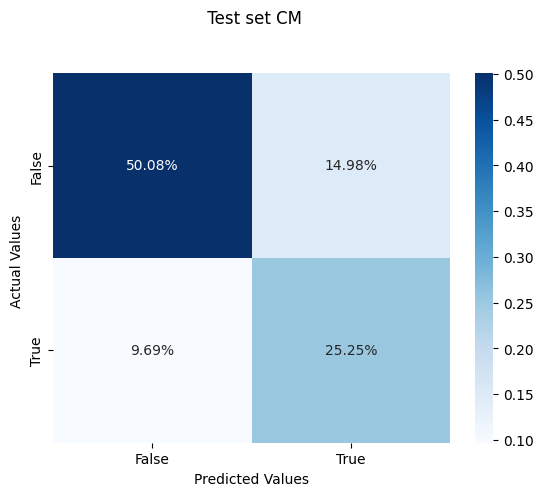

In [29]:
# #####################################  CONFUSION MATRIX for pred set   ########################################################################
fig1=plt.figure()
cm = confusion_matrix(y_true=ydt, y_pred=y_pred)

ax = sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title(' Test set CM\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


fig1 = ax.get_figure()
fig1.savefig("RFC_dcLWT_tetra_set1_pred_set2_v1.pdf")